In [2]:
import pandas as pd
majors = pd.read_csv('https://raw.githubusercontent.com/misrab/homework/master/BalaCattavarayane/data/college-majors.csv')
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000


In [4]:
# 1. Delete the columns (employed_full_time_year_round, major_code)
majors.drop(['Employed_full_time_year_round','Major_code'], axis=1, inplace=True)
majors.head()

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000


In [6]:
# 2. Show the count of missing values in each column
len(majors.index)- majors.count()

Unnamed: 0           0
Major                0
Major_category       0
Total                0
Employed             0
Unemployed           0
Unemployment_rate    0
Median               0
P25th                0
P75th                0
dtype: int64

In [8]:
# 3. What are the top 10 highest paying majors?
## Take this to mean, "Going by the median salaries, what are the top 10 highest paying majors"

topMajors = majors.groupby('Major').Median.mean().sort_values(ascending=False).head(10)
topMajors

Major
PETROLEUM ENGINEERING                                  125000
PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTRATION    106000
NAVAL ARCHITECTURE AND MARINE ENGINEERING               97000
METALLURGICAL ENGINEERING                               96000
NUCLEAR ENGINEERING                                     95000
MINING AND MINERAL ENGINEERING                          92000
MATHEMATICS AND COMPUTER SCIENCE                        92000
ELECTRICAL ENGINEERING                                  88000
CHEMICAL ENGINEERING                                    86000
GEOLOGICAL AND GEOPHYSICAL ENGINEERING                  85000
Name: Median, dtype: int64

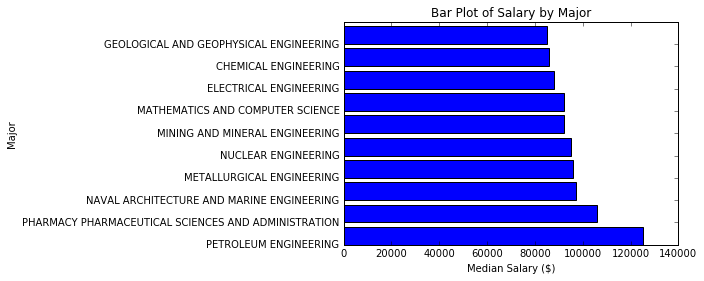

In [13]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.barh(np.arange(len(topMajors)),topMajors,align='edge')
plt.yticks(np.arange(len(topMajors)),np.array(topMajors.index))
plt.ylabel("Major")
plt.xlabel("Median Salary ($)")
plt.title("Bar Plot of Salary by Major")

In [14]:
# 5. What is the average median salary for each major category?
## Take this to mean "What is the average of the median salaries across the respective major categories?"

majors.groupby('Major_category').Median.mean()

Major_category
Agriculture & Natural Resources        55000.000000
Arts                                   43525.000000
Biology & Life Science                 50821.428571
Business                               60615.384615
Communications & Journalism            49500.000000
Computers & Mathematics                66272.727273
Education                              43831.250000
Engineering                            77758.620690
Health                                 56458.333333
Humanities & Liberal Arts              46080.000000
Industrial Arts & Consumer Services    52642.857143
Interdisciplinary                      43000.000000
Law & Public Policy                    52800.000000
Physical Sciences                      62400.000000
Psychology & Social Work               44555.555556
Social Science                         53222.222222
Name: Median, dtype: float64

In [15]:
# 6. Show only the top 5 paying major categories
## Take this to mean "Show top 5 major paying categories, by the average of the median salary for each category"

top5Majors = majors.groupby('Major_category').Median.mean().sort_values(ascending=False).head(5)
top5Majors

Major_category
Engineering                77758.620690
Computers & Mathematics    66272.727273
Physical Sciences          62400.000000
Business                   60615.384615
Health                     56458.333333
Name: Median, dtype: float64

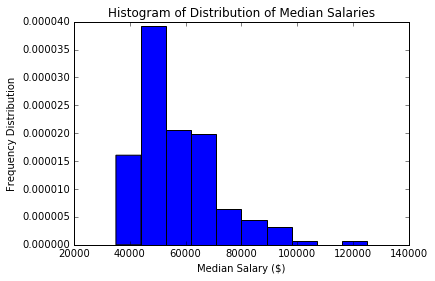

In [16]:
# 7. Plot a histogram of the distribution of median salaries
plt.hist(majors.Median,color='blue',normed=True)
plt.title("Histogram of Distribution of Median Salaries")
plt.xlabel("Median Salary ($)")
plt.ylabel("Frequency Distribution")

Major_category
Agriculture & Natural Resources        [[Axes(0.125,0.125;0.775x0.775)]]
Arts                                   [[Axes(0.125,0.125;0.775x0.775)]]
Biology & Life Science                 [[Axes(0.125,0.125;0.775x0.775)]]
Business                               [[Axes(0.125,0.125;0.775x0.775)]]
Communications & Journalism            [[Axes(0.125,0.125;0.775x0.775)]]
Computers & Mathematics                [[Axes(0.125,0.125;0.775x0.775)]]
Education                              [[Axes(0.125,0.125;0.775x0.775)]]
Engineering                            [[Axes(0.125,0.125;0.775x0.775)]]
Health                                 [[Axes(0.125,0.125;0.775x0.775)]]
Humanities & Liberal Arts              [[Axes(0.125,0.125;0.775x0.775)]]
Industrial Arts & Consumer Services    [[Axes(0.125,0.125;0.775x0.775)]]
Interdisciplinary                      [[Axes(0.125,0.125;0.775x0.775)]]
Law & Public Policy                    [[Axes(0.125,0.125;0.775x0.775)]]
Physical Sciences                   

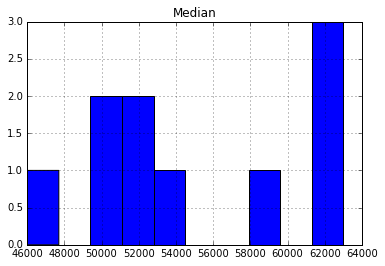

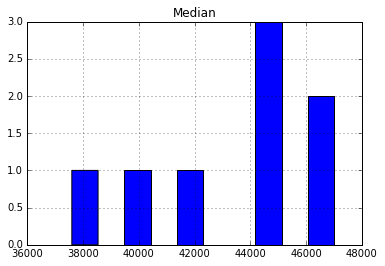

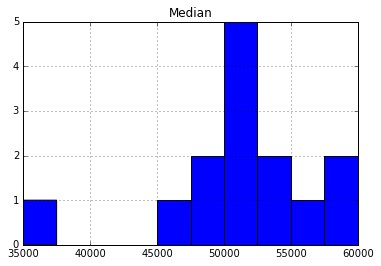

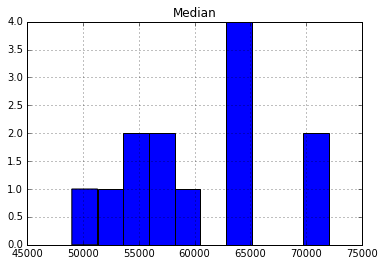

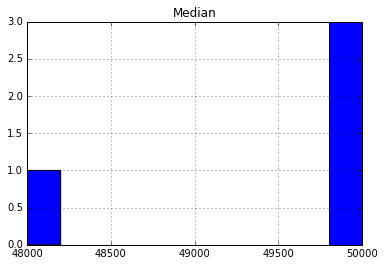

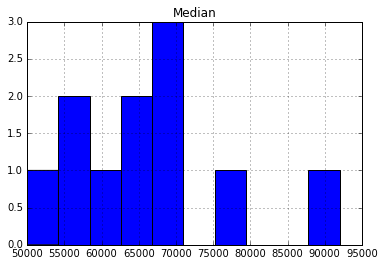

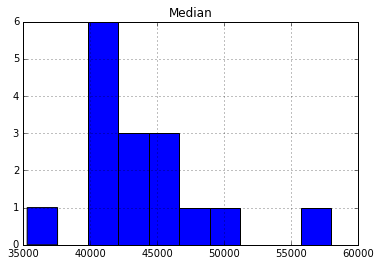

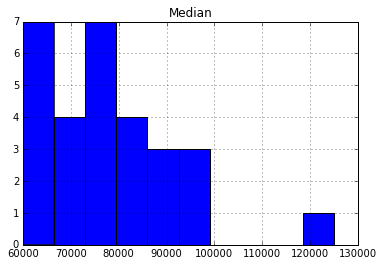

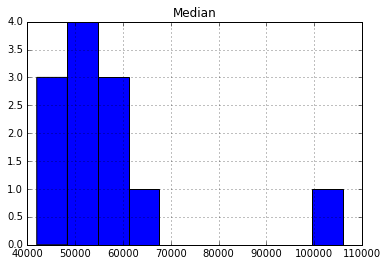

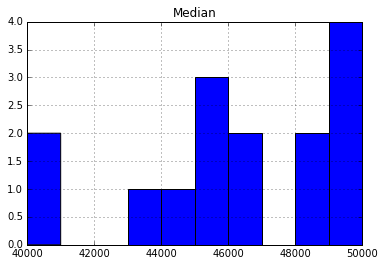

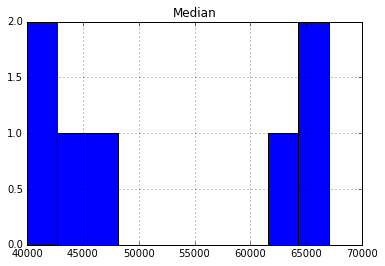

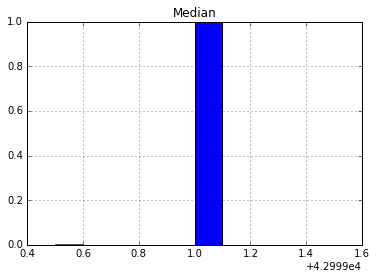

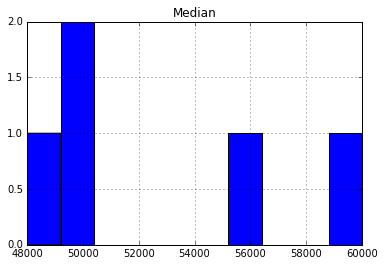

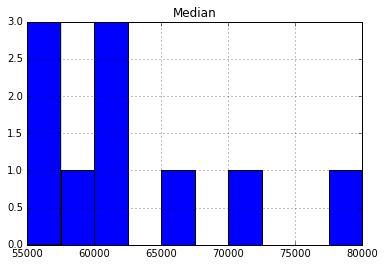

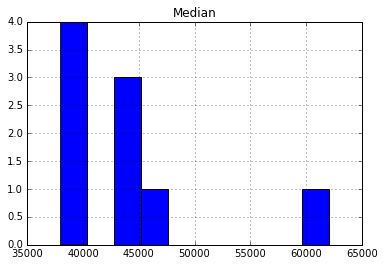

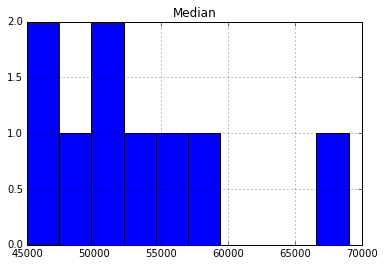

In [17]:
# 8. Plot a histogram of the distribution of median salaries by major category
majors.groupby('Major_category').hist('Median')

In [18]:
# 9. What are the top 10 most UNemployed majors?
# What are the unemployment rates?
majors[['Major','Unemployment_rate','Unemployed']].sort_values(by='Unemployed',ascending=False).head(10)

,Major,Unemployment_rate,Unemployed
161,BUSINESS MANAGEMENT AND ADMINISTRATION,0.058865,147261
158,GENERAL BUSINESS,0.051378,85626
114,PSYCHOLOGY,0.069667,79066
159,ACCOUNTING,0.053415,75379
13,COMMUNICATIONS,0.064360,54390
73,ENGLISH LANGUAGE AND LITERATURE,0.068645,52248
164,MARKETING AND MARKETING RESEARCH,0.055033,51839
132,POLITICAL SCIENCE AND GOVERNMENT,0.069374,40376
25,GENERAL EDUCATION,0.043904,38742
78,BIOLOGY,0.059301,36757


In [39]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category
# What are the unemployment rates?
#majors[['Major_category','Unemployment_rate','Unemployed'], ].sort_values(by='Unemployed',ascending=False).head(10)

majGroup = majors.groupby(['Major_category','Unemployment_rate','Unemployed'])
majGroup.Median.mean()


Major_category                   Unemployment_rate  Unemployed
Agriculture & Natural Resources  0.026147           2423          50000
                                 0.028636           2266          54000
                                 0.030248           821           63000
                                 0.031791           2070          50000
                                 0.039230           261           52000
                                 0.042563           2144          58000
                                 0.042679           3619          46000
                                 0.049188           894           62000
                                 0.050867           264           63000
                                 0.054341           3789          52000
Arts                             0.054719           11155         45000
                                 0.071753           29912         45000
                                 0.073920           30330         46600
 